In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import tensorflow as tf
import keras 
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from keras import backend as K
from keras.utils import plot_model
from keras.utils import multi_gpu_model
from sklearn.model_selection import StratifiedKFold
import cv2
from skimage import io

from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,roc_curve,auc

from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
from keras import losses
from skimage.io import imsave, imread

from keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.resnet152 import ResNet152

os.environ["CUDA_VISIBLE_DEVICES"] = "4,5"

/home/dgxadmin/anaconda3/envs/zzaem2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dgxadmin/anaconda3/envs/zzaem2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dgxadmin/anaconda3/envs/zzaem2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dgxadmin/anaconda3/envs/zzaem2/lib

In [2]:
pwd

'/home/dgxadmin/gcubme_ai/Workspace/JW_Seo/DVT_detection/Radiomics/code/deep_learning'

In [10]:
input_img = Input(shape=(32,32,1))
input_img.shape

TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(1)])

In [4]:
model = keras.applications.resnet.ResNet50(include_top=False, input_tensor=Input(shape=(32,32,1)), weights=None, input_shape=(32,32,1), pooling='avg')

In [10]:
print(model.outputs[0])

Tensor("dense_2_1/concat:0", shape=(?, 1), dtype=float32, device=/device:CPU:0)


In [2]:
def vgg_app_16(inputs):
    
    input_x = keras.applications.VGG16(include_top=False, input_tensor=inputs, weights=None, input_shape=(32,32,1), pooling='avg')
    x = input_x.outputs[0]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(x)
    

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(x)  
    out = Dense(1, activation="sigmoid")(x)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model

# input_img = Input(shape=(32,32,1))
# model = vgg_app_16(input_img)
# model.summary()   

def vgg_app_19(inputs):
    
    input_x = keras.applications.VGG19(include_top=False, input_tensor=inputs, weights=None, input_shape=(32,32,1), pooling='avg')
    x = input_x.outputs[0]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(x)
    

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(x)  
    out = Dense(1, activation="sigmoid")(x)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model

# def resnet_app_50(inputs):
    
#     resnet = keras_resnet.models.ResNet50(inputs, include_top=False, freeze_bn=False)
#     resout=resnet.outputs[3]
    
# #     flatten_layer = Flatten()  
# #     out = flatten_layer(resout)

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(resout)  
#     out = Dense(1, activation="sigmoid")(out)
    
    
#     model = Model(inputs=inputs, outputs=out)
    
#     return model
def resnet_app_50(inputs):
    
    input_x = keras.applications.resnet.ResNet50(include_top=False, input_tensor=inputs, weights=None, input_shape=(32,32,1), pooling='avg')
    x=input_x.outputs[0]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(resout)

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(resout)  
    out = Dense(1, activation="sigmoid")(x)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model
# input_img = Input(shape=(32,32,1))    
# model = resnet_app_50(input_img)
# model.summary()
def resnet_app_152(inputs):
    
    input_x = keras.applications.resnet.ResNet152(include_top=False, input_tensor=inputs, weights=None, input_shape=(32,32,1), pooling='avg')
    x=input_x.outputs[0]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(resout)

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(resout)  
    out = Dense(1, activation="sigmoid")(x)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model
def resnet_app_34(inputs):
    
    resnet = keras_resnet.models.ResNet34(inputs, include_top=False, freeze_bn=False)
    resout=resnet.outputs[3]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(resout)

    GAP_layer=GlobalAveragePooling2D()
    out = GAP_layer(resout)  
    out = Dense(1, activation="sigmoid")(out)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model  

def resnet_app_18(inputs):
    
    resnet = keras_resnet.models.ResNet18(inputs, include_top=False, freeze_bn=False)
    resout=resnet.outputs[3]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(resout)

    GAP_layer=GlobalAveragePooling2D()
    out = GAP_layer(resout)  
    out = Dense(1, activation="sigmoid")(out)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model 

In [4]:
def calculate_performance(pred, test_y):
    tp=0
    fp=0
    tn=0
    fn=0
    alpha = 0.0001
    for cm in range(len(test_y)):
        if list(test_y)[cm]==0:
            if pred[cm]<0.5:
                tn+=1
            else:
                fn+=1
        else:
            if pred[cm]<0.5:
                fp+=1
            else:
                tp+=1
    print(tp, fp, tn, fn)
    sensitivity= (tp+alpha)/(tp+fn+alpha)
    specificity= (tn+alpha)/(tn+fp+alpha) 
    acc = (tp+tn+alpha)/(tp+fp+tn+fn+alpha)
    prec = (tp+alpha)/(tp+fp+alpha)

    return tp, fp, tn, fn, sensitivity, specificity, acc, prec

(1624, 32, 32, 1) (1624,)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: 1299 TEST: 325
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
163 1 0 973
TRAIN: 1299 TEST: 325
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
0 164 163 1135
TRAIN: 1299 TEST: 325
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
0 327 326 1298
TRAIN: 1299 TEST: 325
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
0 489 488 1461
TRAIN: 1300 TEST: 324
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
0 650 1461 1623


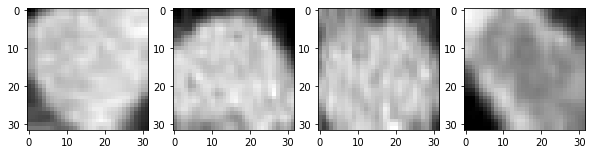

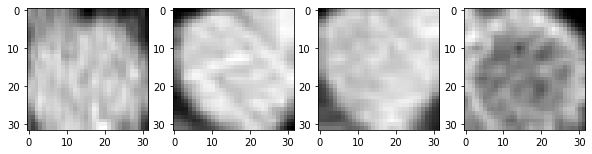

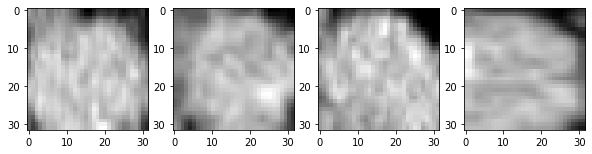

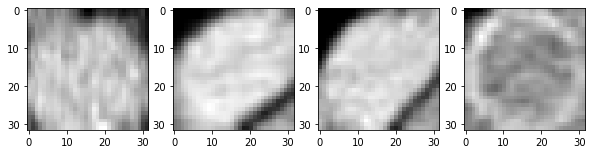

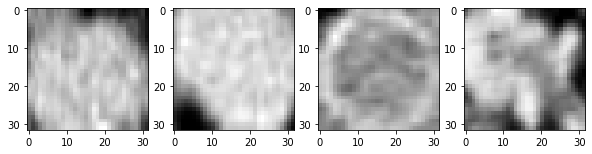

In [5]:
k=5

abnormal = np.load('../../data/npy/abnormal_16to32.npy')
normal = np.load('../../data/npy/normal_16to32.npy')
data_x = np.concatenate((normal, abnormal))
data_y = np.ndarray((len(data_x)),dtype=np.float32)
for n in range(len(data_x)):
    if n < len(normal):
        data_y[n] = 0
    else:
        data_y[n] = 1
print(data_x.shape, data_y.shape)        
# train_x,train_x,test_y,test_y = train_test_split(data_x,data_y, stratify = data_y, train_size=1300, random_state = 25)

skf = StratifiedKFold(n_splits=k)
skf.get_n_splits(data_x,data_y)
print(skf)
i=0
for train_index, test_index in skf.split(data_x,data_y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    indexs = np.concatenate((train_index, test_index), axis= 0)
    train_index = indexs[:1300]
    test_index = indexs[1300:]
    print("RETRAIN:", len(train_index), "RETEST:", len(test_index))
    train_x, test_x = data_x[train_index], data_x[test_index]
    train_y, test_y = data_y[train_index], data_y[test_index]
    print(train_x.shape, test_x.shape)
    plt.figure(figsize=(10,10))
    print(train_index[0],test_index[0],train_index[len(train_index)-1],test_index[len(test_index)-1])
    plt.subplot(1,4,1)
    plt.imshow(train_x[0], cmap='gray')
    plt.subplot(1,4,2)
    plt.imshow(test_x[0], cmap='gray')
    plt.subplot(1,4,3)
    plt.imshow(train_x[len(train_x)-1], cmap='gray')
    plt.subplot(1,4,4)
    plt.imshow(test_x[len(test_x)-1], cmap='gray')
 

In [6]:
savepath='./210514_resnet152_application_0001'
model_type='resnet152_app'
date='0514'
os.makedirs(savepath+'/npy', exist_ok=True)
os.makedirs(savepath+'/result', exist_ok=True)
os.makedirs(savepath+'/model', exist_ok=True)
i=0
performances = np.ndarray((k,4), dtype=np.float32)

for train_index, test_index in skf.split(data_x,data_y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
#     indexs = np.concatenate((train_index, test_index), axis= 0)
#     train_index = indexs[:1300]
#     test_index = indexs[1300:]
#     print("RETRAIN:", len(train_index), "RETEST:", len(test_index))
    dtrain_x, test_x = data_x[train_index], data_x[test_index]
    dtrain_y, test_y = data_y[train_index], data_y[test_index]
    
    np.save(savepath+'/npy/test_x_fold{}.npy'.format(str(i)), test_x)
    np.save(savepath+'/npy/test_y_fold{}.npy'.format(str(i)), test_y)
    np.save(savepath+'/npy/train_x_fold{}.npy'.format(str(i)), train_x)
    np.save(savepath+'/npy/train_y_fold{}.npy'.format(str(i)), train_y)
    
    train_x,val_x,train_y,val_y = train_test_split(dtrain_x,dtrain_y, stratify = dtrain_y, train_size=1040)

    input_img = Input(shape=(32,32,1))
#     model = keras.applications.resnet.ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=(32,32,2), pooling=None, classes=2)
    model= resnet_app_152(input_img)
    model = multi_gpu_model(model, gpus=2)
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    checkpointer = ModelCheckpoint(filepath=savepath+'/model/{}_fold{}_{}.h5'.format(model_type, str(i),date), verbose=1, save_best_only=True, monitor='val_loss')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                  patience=10, min_lr=0, min_delta=0.001, verbose=1)
    earlystopper = EarlyStopping(patience=30, verbose=1, monitor='val_loss')
    callbacks_list = [reduce_lr, checkpointer, earlystopper]
    
    results = model.fit(train_x, train_y, batch_size=128, epochs=500, verbose=1, validation_data=(val_x, val_y), shuffle=False, callbacks=callbacks_list)
    i+=1

TRAIN: 1299 TEST: 325

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1040 samples, validate on 259 samples
Epoch 1/500
1040/1040 [==============================] - 82s 79ms/step - loss: 0.9044 - accuracy: 0.5481 - val_loss: 0.7310 - val_accuracy: 0.4826

Epoch 00001: val_loss improved from inf to 0.73104, saving model to ./210514_resnet152_application_0001/model/resnet152_app_fold0_0514.h5
Epoch 2/500
1040/1040 [==============================] - 5s 5ms/step - loss: 0.7151 - accuracy: 0.6337 - val_loss: 0.7054 - val_accuracy: 0.5019

Epoch 00002: val_loss improved from 0.73104 to 0.70538, saving model to ./210514_resnet152_application_0001/model/resnet152_app_fold0_0514.h5
Epoch 3/500
1040/1040 [==============================] - 5s 4ms/step - loss: 0.6952 - accuracy: 0.6394 - val_loss: 0.7086 - val_accuracy: 0.5019

Epoch 00003: val_loss did not improve from 0.70538
Epoch 4/500
1040/1040 [==============================] - 4s 4ms/

In [7]:
# check model and save result
i=0
performances = np.ndarray((k,4), dtype=np.float32)
for i in range(k):
    print(i)
    test_model = load_model(savepath+'/model/{}_fold{}_{}.h5'.format(model_type,str(i),date))
    test_x= np.load(savepath+'/npy/test_x_fold{}.npy'.format(str(i)))
    test_y= np.load(savepath+'/npy/test_y_fold{}.npy'.format(str(i)))
    test_result= test_model.predict(test_x, batch_size=128, verbose=1)
    np.save(savepath+'/npy/test_result_fold{}.npy'.format(str(i)), test_result)
    fpr_res,tpr_res,_=roc_curve(test_y,test_result)
    auc_res=auc(fpr_res, tpr_res)
    #     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
    res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)
    
    performanceList = [auc_res, res_sensitivity, res_specificity, acc]
    for a in range(4):
        performances[i][a] = performanceList[a]
    
#     interp_tpr = np.interp(mean_fpr, _, _)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     np.save('./210512/npy/performanceList_fold{}.npy'.format(str(i)), performances)
    print('###########RESULT########')
    print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
    print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
    print('#########################')
    i=+1
np.save(savepath+'/npy/{}_performanceList.npy'.format(model_type), performances)
all_perform = pd.DataFrame(performances)
all_perform.to_csv(savepath+'/result/all_{}_perform.csv'.format(model_type))

0
325/325 [==============================] - 46s 141ms/step
162 0 0 163
###########RESULT########
AUC:0.244, SEN:0.498, SPEC:1.0, ACC:0.498, PREC:1.0
TP:162, FP:0. TN:0, FN:163
#########################
1
325/325 [==============================] - 68s 209ms/step
109 53 141 22
###########RESULT########
AUC:0.875, SEN:0.832, SPEC:0.727, ACC:0.769, PREC:0.673
TP:109, FP:53. TN:141, FN:22
#########################
2
325/325 [==============================] - 54s 167ms/step
152 11 93 69
###########RESULT########
AUC:0.878, SEN:0.688, SPEC:0.894, ACC:0.754, PREC:0.933
TP:152, FP:11. TN:93, FN:69
#########################
3
325/325 [==============================] - 61s 188ms/step
93 70 116 46
###########RESULT########
AUC:0.6, SEN:0.669, SPEC:0.624, ACC:0.643, PREC:0.571
TP:93, FP:70. TN:116, FN:46
#########################
4
324/324 [==============================] - 74s 228ms/step
151 11 95 67
###########RESULT########
AUC:0.885, SEN:0.693, SPEC:0.896, ACC:0.759, PREC:0.932
TP:151, FP:11. 

0
162 0 0 163
###########RESULT########
AUC:0.244, SEN:0.498, SPEC:1.0, ACC:0.498, PREC:1.0
TP:162, FP:0. TN:0, FN:163
#########################
1
109 53 141 22
###########RESULT########
AUC:0.875, SEN:0.832, SPEC:0.727, ACC:0.769, PREC:0.673
TP:109, FP:53. TN:141, FN:22
#########################
2
152 11 93 69
###########RESULT########
AUC:0.878, SEN:0.688, SPEC:0.894, ACC:0.754, PREC:0.933
TP:152, FP:11. TN:93, FN:69
#########################
3
93 70 116 46
###########RESULT########
AUC:0.6, SEN:0.669, SPEC:0.624, ACC:0.643, PREC:0.571
TP:93, FP:70. TN:116, FN:46
#########################
4
151 11 95 67
###########RESULT########
AUC:0.885, SEN:0.693, SPEC:0.896, ACC:0.759, PREC:0.932
TP:151, FP:11. TN:95, FN:67
#########################


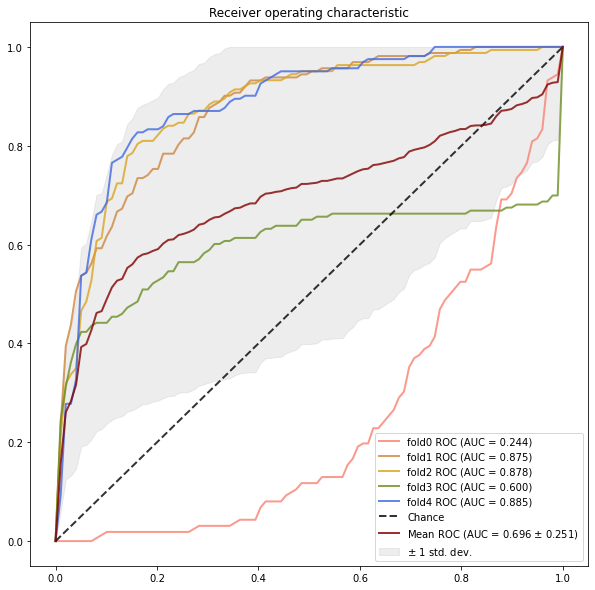

In [8]:
# print(performanceList)

k=5
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
colors = ['salmon', 'peru', 'goldenrod', 'olivedrab', 'royalblue']
# fig=plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(10,10))
# performances = np.ndarray((k,4), dtype=np.float32)
for i in range(k):
    print(i)
#     test_model = load_model(savepath+'/model/residual3_filter4_fold{}_0512.h5'.format(str(i)))
    test_x= np.load(savepath+'/npy/test_x_fold{}.npy'.format(str(i)))
    test_y= np.load(savepath+'/npy/test_y_fold{}.npy'.format(str(i)))
    test_result= np.load(savepath+'/npy/test_result_fold{}.npy'.format(str(i)))
#     np.save(savepath+'/npy/test_result_fold{}.npy'.format(str(i)), test_result)
    fpr_res,tpr_res,_=roc_curve(test_y,test_result)
    auc_res=auc(fpr_res, tpr_res)
    #     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
    res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)
    
    performanceList = [auc_res, res_sensitivity, res_specificity, acc]
    for a in range(4):
        performances[i][a] = performanceList[a]
    
#     interp_tpr = np.interp(mean_fpr, _, _)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     np.save('./210512/npy/performanceList_fold{}.npy'.format(str(i)), performances)
    print('###########RESULT########')
    print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
    print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
    print('#########################')
#     i=+1

    interp_tpr = np.interp(mean_fpr, fpr_res,tpr_res)
    interp_tpr[0] = 0.0
    
#     fig, ax = plt.subplots()
    
    ax.plot(mean_fpr, interp_tpr, color=colors[i],
        label=r'fold%s ROC (AUC = %0.3f)' % (str(i),auc_res),
        lw=2, alpha=.8)

    tprs.append(interp_tpr)
    aucs.append(auc_res)
    
# fig, ax = plt.subplots()
# fig = plt.figure(figsize=(10,10))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr_xgb = np.mean(tprs, axis=0)
mean_tpr_xgb[-1] = 1.0
mean_auc_xgb = auc(mean_fpr, mean_tpr_xgb)
std_auc_xgb = np.std(aucs)
ax.plot(mean_fpr, mean_tpr_xgb, color='maroon',
        label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc_xgb, std_auc_xgb),
        lw=2, alpha=.8)
# ax.plot(mean_fpr, interp_tpr, color='navy',
#         label=r'Mean ROC (AUC = %0.3f)' % (auc_res),
#         lw=2, alpha=.8)

std_tpr_xgb = np.std(tprs, axis=0)
tprs_upper_xgb = np.minimum(mean_tpr_xgb + std_tpr_xgb, 1)
tprs_lower_xgb = np.maximum(mean_tpr_xgb - std_tpr_xgb, 0)
ax.fill_between(mean_fpr, tprs_lower_xgb, tprs_upper_xgb, color='darkgray', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# fig.savefig('./result/0512/LR_embedded_cv5.jpg')
# plt.figure(figsize=(20,20))
plt.show()
fig.savefig(savepath+'/result/{}_cv5_first_{}.jpg'.format(model_type, date), dpi=300)

np.save(savepath+'/result/mean_tpr_{}_{}.npy'.format(model_type, date), mean_tpr_xgb)

In [10]:
# check train set for overfitting
i=0
performances = np.ndarray((k,4), dtype=np.float32)
for i in range(k):
    print(i)
    test_model = load_model(savepath+'/model/{}_fold{}_{}.h5'.format(model_type,str(i),date))
    test_x= np.load(savepath+'/npy/train_x_fold{}.npy'.format(str(i)))
    test_y= np.load(savepath+'/npy/train_y_fold{}.npy'.format(str(i)))
    test_result= test_model.predict(test_x, batch_size=128, verbose=1)
    np.save(savepath+'/npy/train_result_fold{}.npy'.format(str(i)), test_result)
    fpr_res,tpr_res,_=roc_curve(test_y,test_result)
    auc_res=auc(fpr_res, tpr_res)
    #     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
    res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)
    
    performanceList = [auc_res, res_sensitivity, res_specificity, acc]
    for a in range(4):
        performances[i][a] = performanceList[a]
    
#     interp_tpr = np.interp(mean_fpr, _, _)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     np.save('./210512/npy/performanceList_fold{}.npy'.format(str(i)), performances)
    print('###########RESULT########')
    print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
    print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
    print('#########################')
    i=+1
np.save(savepath+'/npy/TrainSet{}_performanceList.npy'.format(model_type), performances)
all_perform = pd.DataFrame(performances)
all_perform.to_csv(savepath+'/result/TrainSet_all_{}_perform.csv'.format(model_type))

0
1300/1300 [==============================] - 41s 32ms/step
650 0 0 650
###########RESULT########
AUC:0.324, SEN:0.5, SPEC:1.0, ACC:0.5, PREC:1.0
TP:650, FP:0. TN:0, FN:650
#########################
1
1040/1040 [==============================] - 47s 45ms/step
412 108 443 77
###########RESULT########
AUC:0.904, SEN:0.843, SPEC:0.804, ACC:0.822, PREC:0.792
TP:412, FP:108. TN:443, FN:77
#########################
2
1040/1040 [==============================] - 51s 49ms/step
482 38 347 173
###########RESULT########
AUC:0.907, SEN:0.736, SPEC:0.901, ACC:0.797, PREC:0.927
TP:482, FP:38. TN:347, FN:173
#########################
3
1040/1040 [==============================] - 54s 52ms/step
422 98 377 143
###########RESULT########
AUC:0.82, SEN:0.747, SPEC:0.794, ACC:0.768, PREC:0.812
TP:422, FP:98. TN:377, FN:143
#########################
4
1040/1040 [==============================] - 58s 56ms/step
484 36 344 176
###########RESULT########
AUC:0.916, SEN:0.733, SPEC:0.905, ACC:0.796, PREC:0.931
T

0
650 0 0 650
###########RESULT########
AUC:0.324, SEN:0.5, SPEC:1.0, ACC:0.5, PREC:1.0
TP:650, FP:0. TN:0, FN:650
#########################
1
412 108 443 77
###########RESULT########
AUC:0.904, SEN:0.843, SPEC:0.804, ACC:0.822, PREC:0.792
TP:412, FP:108. TN:443, FN:77
#########################
2
482 38 347 173
###########RESULT########
AUC:0.907, SEN:0.736, SPEC:0.901, ACC:0.797, PREC:0.927
TP:482, FP:38. TN:347, FN:173
#########################
3
422 98 377 143
###########RESULT########
AUC:0.82, SEN:0.747, SPEC:0.794, ACC:0.768, PREC:0.812
TP:422, FP:98. TN:377, FN:143
#########################
4
484 36 344 176
###########RESULT########
AUC:0.916, SEN:0.733, SPEC:0.905, ACC:0.796, PREC:0.931
TP:484, FP:36. TN:344, FN:176
#########################


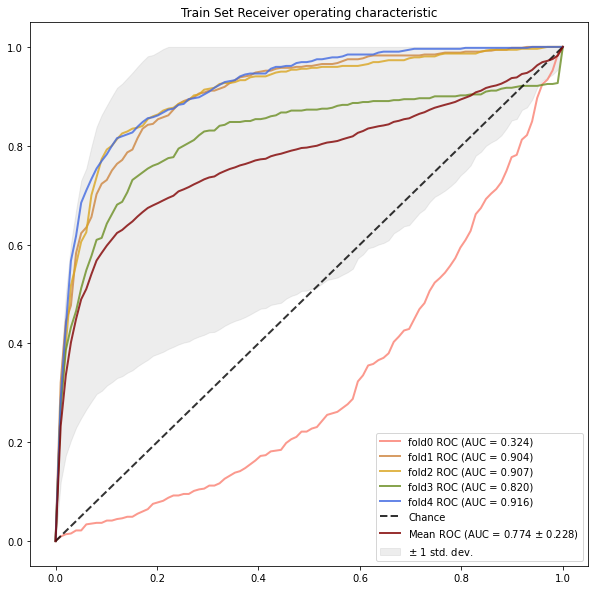

In [11]:
# check train set for overfitting

k=5
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
colors = ['salmon', 'peru', 'goldenrod', 'olivedrab', 'royalblue']
# fig=plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(10,10))
# performances = np.ndarray((k,4), dtype=np.float32)
for i in range(k):
    print(i)
#     test_model = load_model(savepath+'/model/residual3_filter4_fold{}_0512.h5'.format(str(i)))
    test_x= np.load(savepath+'/npy/train_x_fold{}.npy'.format(str(i)))
    test_y= np.load(savepath+'/npy/train_y_fold{}.npy'.format(str(i)))
    test_result= np.load(savepath+'/npy/train_result_fold{}.npy'.format(str(i)))
#     np.save(savepath+'/npy/test_result_fold{}.npy'.format(str(i)), test_result)
    fpr_res,tpr_res,_=roc_curve(test_y,test_result)
    auc_res=auc(fpr_res, tpr_res)
    #     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
    res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)
    
    performanceList = [auc_res, res_sensitivity, res_specificity, acc]
    for a in range(4):
        performances[i][a] = performanceList[a]
    
#     interp_tpr = np.interp(mean_fpr, _, _)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     np.save('./210512/npy/performanceList_fold{}.npy'.format(str(i)), performances)
    print('###########RESULT########')
    print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
    print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
    print('#########################')
#     i=+1

    interp_tpr = np.interp(mean_fpr, fpr_res,tpr_res)
    interp_tpr[0] = 0.0
    
#     fig, ax = plt.subplots()
    
    ax.plot(mean_fpr, interp_tpr, color=colors[i],
        label=r'fold%s ROC (AUC = %0.3f)' % (str(i),auc_res),
        lw=2, alpha=.8)

    tprs.append(interp_tpr)
    aucs.append(auc_res)
    
# fig, ax = plt.subplots()
# fig = plt.figure(figsize=(10,10))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr_xgb = np.mean(tprs, axis=0)
mean_tpr_xgb[-1] = 1.0
mean_auc_xgb = auc(mean_fpr, mean_tpr_xgb)
std_auc_xgb = np.std(aucs)
ax.plot(mean_fpr, mean_tpr_xgb, color='maroon',
        label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc_xgb, std_auc_xgb),
        lw=2, alpha=.8)
# ax.plot(mean_fpr, interp_tpr, color='navy',
#         label=r'Mean ROC (AUC = %0.3f)' % (auc_res),
#         lw=2, alpha=.8)

std_tpr_xgb = np.std(tprs, axis=0)
tprs_upper_xgb = np.minimum(mean_tpr_xgb + std_tpr_xgb, 1)
tprs_lower_xgb = np.maximum(mean_tpr_xgb - std_tpr_xgb, 0)
ax.fill_between(mean_fpr, tprs_lower_xgb, tprs_upper_xgb, color='darkgray', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Train Set Receiver operating characteristic")
ax.legend(loc="lower right")
# fig.savefig('./result/0512/LR_embedded_cv5.jpg')
# plt.figure(figsize=(20,20))
plt.show()
fig.savefig(savepath+'/result/TrainSet_{}_cv5_first_{}.jpg'.format(model_type, date), dpi=300)

np.save(savepath+'/result/TrainSet_mean_tpr_{}_{}.npy'.format(model_type, date), mean_tpr_xgb)

In [14]:
check2 = np.load(savepath+'/npy/test_result_fold2.npy')
checkimg = np.load(savepath+'/npy/test_x_fold2.npy')
checklab = np.load(savepath+'/npy/test_y_fold2.npy')
for ck in range(len(checkimg)):
    io.imsave(savepath+'/check/{}_lab{}.jpg'.format(ck,checklab[ck]), checkimg[ck])

In [15]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [16]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of keras.engine.training.Model instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    # Arguments
        x: Input data. It could be:
            - A Numpy array (or array-like), or a list of arrays
              (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding
              array/tensors, if the model has named inputs.
            - A generator or `keras.utils.Sequence` returning
              `(inputs, targets)` or `(inputs, targets, sample weights)`.
            - None (default) if feeding from framework-native
       

In [19]:
data_x = np.load(savepath+'/npy/train_x_fold2.npy')
data_y = np.load(savepath+'/npy/train_y_fold2.npy')
# train_x,test_x,val_y,val_y = train_test_split(data_x,data_y, stratify = data_y, train_size=1300, random_state = 25)
train_x,val_x,train_y,val_y = train_test_split(data_x,data_y, stratify = data_y, train_size=1040)
input_img = Input(shape=(32,32,1))
model = base_classification_jw(input_img, filters = 4, scale = 2)

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath=savepath+'/model/Check_residual3_filter4_fold2_0512.h5', verbose=1, save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0, min_delta=0.001, verbose=1)
earlystopper = EarlyStopping(patience=30, verbose=1, monitor='loss')
callbacks_list = [reduce_lr, checkpointer, earlystopper]

# results = model.fit(train_x, train_y, batch_size=128, epochs=500, verbose=1, validation_split=0.2, shuffle=False, callbacks=callbacks_list)
results = model.fit(train_x, train_y, batch_size=128, epochs=500, verbose=1, validation_data=(val_x,val_y), shuffle=False, callbacks=callbacks_list)


0
(?, 15, 15, 4)
1
(?, 15, 15, 4) 2 1 4
input
shortcut: (?, 15, 15, 4)
x: (?, 15, 15, 4)
before add
shortcut: (?, 15, 15, 8)
x: (?, 15, 15, 8)
(?, 15, 15, 8)
8
(?, 7, 7, 8)
8
4
4
2
Train on 1040 samples, validate on 259 samples
Epoch 1/500
1040/1040 [==============================] - 4s 4ms/step - loss: 0.7393 - accuracy: 0.4808 - val_loss: 17.5577 - val_accuracy: 0.4981

Epoch 00001: val_loss improved from inf to 17.55765, saving model to ./210512_maxpool3/model/Check_residual3_filter4_fold2_0512.h5
Epoch 2/500
1040/1040 [==============================] - 0s 221us/step - loss: 0.6434 - accuracy: 0.6798 - val_loss: 3.2610 - val_accuracy: 0.5019

Epoch 00002: val_loss improved from 17.55765 to 3.26097, saving model to ./210512_maxpool3/model/Check_residual3_filter4_fold2_0512.h5
Epoch 3/500
1040/1040 [==============================] - 0s 186us/step - loss: 0.5888 - accuracy: 0.7692 - val_loss: 0.7991 - val_accuracy: 0.5251

Epoch 00003: val_loss improved from 3.26097 to 0.79906, saving 

In [21]:
cknum = 2
test_model = load_model(savepath+'/model/Check_residual3_filter4_fold{}_0512.h5'.format(str(cknum)))
test_x= np.load(savepath+'/npy/test_x_fold{}.npy'.format(str(cknum)))
test_y= np.load(savepath+'/npy/test_y_fold{}.npy'.format(str(cknum)))
test_result= test_model.predict(test_x, batch_size=128, verbose=1)
np.save(savepath+'/npy/Check_test_result_fold{}.npy'.format(str(cknum)), test_result)
fpr_res,tpr_res,_=roc_curve(test_y,test_result)
auc_res=auc(fpr_res, tpr_res)
#     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)

performanceList = [auc_res, res_sensitivity, res_specificity, acc]
for a in range(4):
    performances[i][a] = performanceList[a]

#     interp_tpr = np.interp(mean_fpr, _, _)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     np.save('./210512/npy/performanceList_fold{}.npy'.format(str(i)), performances)
print('###########RESULT########')
print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
print('#########################')


325/325 [==============================] - 2s 6ms/step
149 14 151 11
###########RESULT########
AUC:0.974, SEN:0.931, SPEC:0.915, ACC:0.923, PREC:149.0
TP:149, FP:14. TN:151, FN:11
#########################


In [18]:
fpr_res,tpr_res,_=roc_curve(test_y,test_result)
print(test_result)
auc_res=auc(fpr_res, tpr_res)
#     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)

performanceList = [auc_res, res_sensitivity, res_specificity, acc]
for a in range(4):
    performances[i][a] = performanceList[a]

print('###########RESULT########')
print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
print('#########################')

[[0.9999869 ]
 [0.99959576]
 [0.99994624]
 [0.9999691 ]
 [0.999501  ]
 [0.99930984]
 [0.9998659 ]
 [0.999858  ]
 [0.99731463]
 [0.9999136 ]
 [0.99833953]
 [0.99961674]
 [0.9996518 ]
 [0.9096571 ]
 [0.9994147 ]
 [0.99616784]
 [0.99957055]
 [0.99980974]
 [0.9999469 ]
 [0.99958754]
 [0.99999595]
 [0.9996172 ]
 [0.9999841 ]
 [0.99999905]
 [0.9999962 ]
 [0.99925053]
 [0.99989355]
 [0.99996257]
 [1.        ]
 [0.9999984 ]
 [0.99999654]
 [0.9999059 ]
 [0.99999106]
 [0.9999883 ]
 [0.9998714 ]
 [0.99992007]
 [0.99757457]
 [0.9997965 ]
 [0.99993545]
 [0.9996078 ]
 [0.9999801 ]
 [0.99996257]
 [0.9998597 ]
 [0.9999454 ]
 [0.99967587]
 [0.99974585]
 [0.9999724 ]
 [0.99998724]
 [0.9998498 ]
 [0.9999635 ]
 [0.9985348 ]
 [0.99986833]
 [0.9999944 ]
 [0.9999957 ]
 [0.99999994]
 [1.        ]
 [0.9999994 ]
 [0.99999887]
 [0.9996622 ]
 [0.9999901 ]
 [0.9999881 ]
 [0.9999879 ]
 [0.9999871 ]
 [0.999969  ]
 [0.9999974 ]
 [0.99999404]
 [0.9999993 ]
 [0.9999363 ]
 [0.9999872 ]
 [0.99543816]
 [0.9998066 ]
 [0.99

In [ ]:
np.save('./210512/npy/performanceList.npy'.format(str(i)), performances)

all_perform = pd.DataFrame(performances)
all_perform.to_csv('./210512/results/all_perform.csv',columns = ['AUC', 'SEN', 'SPEC', 'ACC'])

In [22]:
test_result= test_model.predict(test_x, batch_size=128, verbose=1)
fpr_res,tpr_res,_=roc_curve(test_y,test_result)
auc_res=auc(fpr_res, tpr_res)
#     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)

print('###########RESULT########')
print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
print('#########################')
i=+1

324/324 [==============================] - 0s 29us/step
###########RESULT########
AUC:0.95, SEN:0.931, SPEC:0.793, ACC:0.849, PREC:0.753
TP:122, FP:40. TN:153, FN:9
#########################


In [19]:
print(test_result)

[[0.04585224]
 [0.08142057]
 [0.04620174]
 [0.05059871]
 [0.06361416]
 [0.06568268]
 [0.08683297]
 [0.10264271]
 [0.01083297]
 [0.13174912]
 [0.05577385]
 [0.07661471]
 [0.01543257]
 [0.01388636]
 [0.02048415]
 [0.32580173]
 [0.07358596]
 [0.0502499 ]
 [0.04689789]
 [0.13231772]
 [0.293616  ]
 [0.09583902]
 [0.07739753]
 [0.03675097]
 [0.6848077 ]
 [0.2552364 ]
 [0.07375526]
 [0.02188268]
 [0.14345899]
 [0.15111724]
 [0.07153687]
 [0.20676428]
 [0.13148901]
 [0.06644467]
 [0.06767535]
 [0.08709502]
 [0.11061043]
 [0.09251931]
 [0.04429752]
 [0.06953326]
 [0.17437395]
 [0.06012797]
 [0.13633728]
 [0.28120077]
 [0.7549337 ]
 [0.2826321 ]
 [0.09157735]
 [0.07570335]
 [0.22305301]
 [0.05381519]
 [0.1612123 ]
 [0.07818568]
 [0.17686266]
 [0.22221968]
 [0.07077688]
 [0.07095507]
 [0.20233962]
 [0.07852384]
 [0.03948566]
 [0.05530366]
 [0.01457918]
 [0.0611915 ]
 [0.34116894]
 [0.8074063 ]
 [0.76968   ]
 [0.03116155]
 [0.11389956]
 [0.02769816]
 [0.0381847 ]
 [0.1099675 ]
 [0.07078376]
 [0.03

In [17]:
results = model.fit(img_train, lab_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2, shuffle=False, callbacks=callbacks_list)
# results = model.fit(img_train, lab_train, batch_size=128, epochs=500, verbose=1, shuffle=False,  callbacks=callbacks_list)

Train on 1040 samples, validate on 260 samples
Epoch 1/500
1040/1040 [==============================] - 3s 3ms/step - loss: 0.7580 - accuracy: 0.5750 - val_loss: 1.1770 - val_accuracy: 0.1538

Epoch 00001: val_loss improved from inf to 1.17698, saving model to ./210303/residual_filter4_0303.h5
Epoch 2/500
1040/1040 [==============================] - 0s 123us/step - loss: 0.6640 - accuracy: 0.6327 - val_loss: 1.0278 - val_accuracy: 0.1615

Epoch 00002: val_loss improved from 1.17698 to 1.02781, saving model to ./210303/residual_filter4_0303.h5
Epoch 3/500
1040/1040 [==============================] - 0s 154us/step - loss: 0.6349 - accuracy: 0.6375 - val_loss: 0.9300 - val_accuracy: 0.2115

Epoch 00003: val_loss improved from 1.02781 to 0.93001, saving model to ./210303/residual_filter4_0303.h5
Epoch 4/500
1040/1040 [==============================] - 0s 122us/step - loss: 0.6196 - accuracy: 0.6692 - val_loss: 0.8798 - val_accuracy: 0.2192

Epoch 00004: val_loss improved from 0.93001 to 0.

In [46]:
# model = load_model('basic_class_32_bilinear_1.h5')

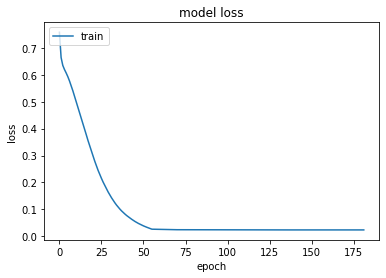

In [18]:
fig = plt.figure()
plt.axes(facecolor='white')
plt.plot(results.history['loss'])
# plt.plot(results.history['accuracy'])
# plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'acc'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.savefig('./210303/residual_filter4_0303.jpg',dpi=300, facecolor='w', edgecolor='w')
plt.show()

In [19]:
test_results= model.predict(img_test, batch_size=128, verbose=1)

324/324 [==============================] - 0s 775us/step


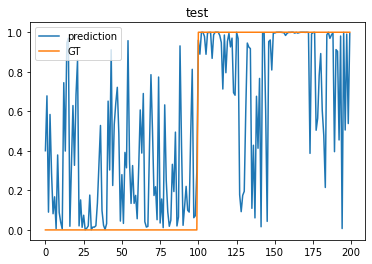

In [16]:
fig = plt.figure()
# plt.axes(facecolor='white')
plt.plot(test_results)
plt.plot(lab_test)
plt.title('test')
plt.legend(['prediction', 'GT'], loc='upper left')
plt.savefig('./result_res_loss_32_169prox400',dpi=200, facecolor='w', edgecolor='w')
plt.show()

In [20]:
score= model.evaluate(img_test, lab_test)
print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))

324/324 [==============================] - 0s 289us/step
loss: 0.20, 정확도: 0.923  


In [18]:
print(test_results)

[[4.0060118e-01]
 [6.7817378e-01]
 [8.9892894e-02]
 [5.8406210e-01]
 [2.8877646e-01]
 [8.1870347e-02]
 [1.6748384e-01]
 [6.3778693e-03]
 [3.7915963e-01]
 [8.8254735e-02]
 [3.8430326e-02]
 [4.6315421e-03]
 [7.4479294e-01]
 [3.9892825e-01]
 [9.4616103e-01]
 [9.7020668e-01]
 [1.8380910e-02]
 [3.2021514e-01]
 [6.2913162e-01]
 [3.2677647e-01]
 [6.8366688e-01]
 [8.5860056e-01]
 [2.0336865e-02]
 [1.5174237e-01]
 [1.3121969e-02]
 [7.4305296e-02]
 [8.9012412e-04]
 [8.2124732e-03]
 [2.0217292e-02]
 [1.7631860e-01]
 [9.1882591e-04]
 [1.4407821e-02]
 [1.3999150e-02]
 [2.1091526e-02]
 [1.3625953e-01]
 [3.3138773e-01]
 [5.2840787e-01]
 [9.7708941e-02]
 [2.3281140e-02]
 [2.2622342e-03]
 [3.1449743e-02]
 [6.5144682e-01]
 [3.0314288e-01]
 [9.1121638e-01]
 [2.2471367e-01]
 [5.3340232e-01]
 [6.4104241e-01]
 [7.2139210e-01]
 [4.8776734e-01]
 [4.4714373e-02]
 [2.7965719e-01]
 [3.2943148e-02]
 [3.9206159e-01]
 [3.1421232e-01]
 [9.5734292e-01]
 [3.4261438e-01]
 [1.3404512e-01]
 [3.2555050e-01]
 [1.3441288e-0

In [22]:
print(len(test_results), len(img_test))

324 324


In [39]:
TN=0
TP=0
FN=0
FP=0
# predicts=[]
for i in range(len(test_results)):
    if i<int(len(test_results)/2):
#         label= 'label: 0'
        if test_results[i]<0.5:
            TN+=1
#             plt.figure()
#             plt.title("num:"+ str(i)+', label: 0, probability:'+str(test_results[i])+ ', predict: 0, normal')
#             plt.imshow(img_test[i,:,:,0],cmap='gray')
#             plt.savefig('./210303/result_img/'+str(i),dpi=200, facecolor='w', edgecolor='w')
            
        else:
            FP+=1
#             plt.figure()
#             plt.title("num:"+ str(i)+', label: 0, probability:'+str(test_results[i])+ ', predict: 1, abnormal')
#             plt.imshow(img_test[i,:,:,0],cmap='gray')
#             plt.savefig('./210303/result_img/'+str(i),dpi=200, facecolor='w', edgecolor='w')
            
    else:
        label= 'label: 1'
        if test_results[i]<0.5:
            FN+=1
#             plt.figure()
#             plt.title("num:"+ str(i)+', label: 1, probability:'+str(test_results[i])+ ', predict: 0, normal')
#             plt.imshow(img_test[i,:,:,0],cmap='gray')
#             plt.savefig('./210303/result_img/'+str(i),dpi=200, facecolor='w', edgecolor='w')
            
        else:
            TP+=1
#             plt.figure()
#             plt.title("num:"+ str(i)+', label: 1, probability:'+str(test_results[i])+ ', predict: 1, abnormal')
#             plt.imshow(img_test[i,:,:,0],cmap='gray')
#             plt.savefig('./210303/result_img/'+str(i),dpi=200, facecolor='w', edgecolor='w')

In [40]:
print(TP, FP, FN, TN)

155 18 7 144


In [44]:
acc = (TP+TN)/(TP+FP+TN+FN)
prec = TP/(TP+FP)
recall = TP/(TP+FN)
spec = 1-(FP/(TN+FP))

print(acc,prec, recall, spec)

0.9228395061728395 0.8959537572254336 0.9567901234567902 0.8888888888888888


In [25]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,roc_curve,auc

In [26]:
fpr_lr,tpr_lr,_=roc_curve(lab_test,test_results)


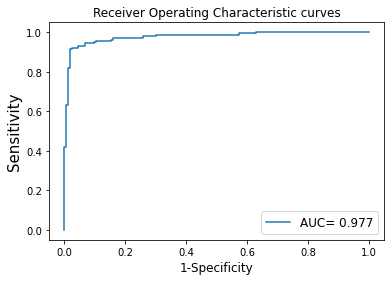

In [27]:
auc_lr=auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label="AUC= %s"%(round(auc_lr,3)))
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel('1-Specificity',fontsize=12)
plt.ylabel('Sensitivity',fontsize=15)
plt.title('Receiver Operating Characteristic curves')
plt.legend(loc="lower right",fontsize=12)

plt.savefig('./210303/ROC_residual_filter4_0303.jpg',dpi=300, facecolor='w', edgecolor='w')


In [31]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [33]:
predicts=[]
for proba in test_results:
    if proba > 0.5:
        predicts.append(1)
    else:
        predicts.append(0)
print(predicts)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


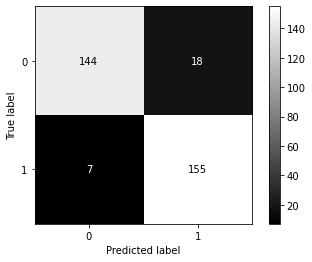

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


confusionMatrix = confusion_matrix(lab_test, predicts)

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

disp.plot(cmap='gray')
